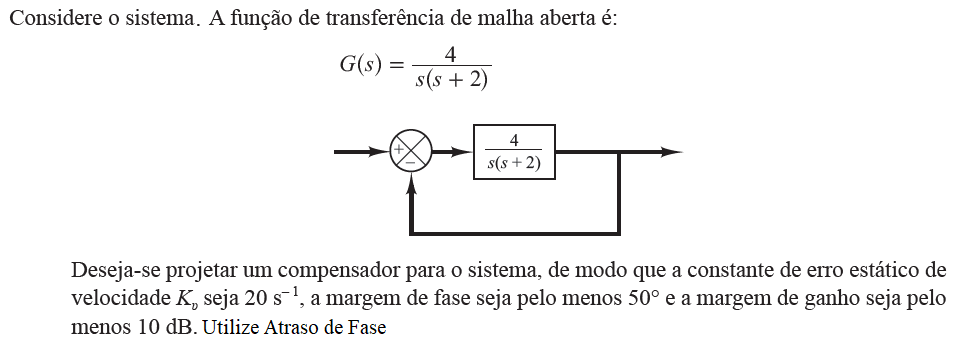

In [1]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 9.2 MB/s eta 0:00:00



#Compensador Atraso
$G_c(s)=K_c \cdot \beta \frac{Ts+1} {\beta Ts+1}  $

Tal que $\beta$ >1
Como $K_v$ do sistema é $2s^{-1}$

$K_c \cdot \beta = 10$

In [2]:
from control import matlab as mtb

num=[4]
den=[1,2,0]
G=mtb.tf(num,den)

MG, MF, wcf, wcg = mtb.margin(G)

print(f"Margem de Ganho {MG} e freq. cruz. de fase {wcf}")
print(f"Margem de Fase {MF}  e freq. cruz. de ganho {wcg}")

Margem de Ganho inf e freq. cruz. de fase nan
Margem de Fase 51.827292372987756  e freq. cruz. de ganho 1.572302755514846


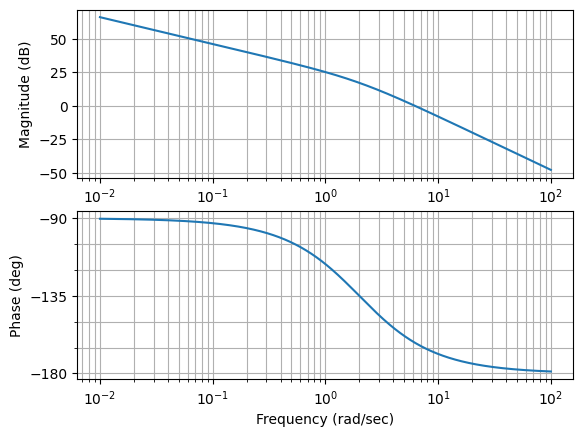

In [3]:
import numpy as np

w = np.logspace(-2,2,2000)
Kcbeta=10
Modulo, Fase, w = mtb.bode(Kcbeta*G,w)
Modulo = 20*np.log10(Modulo)
Fase = Fase*180/np.pi

1072
Fase -124.92662782764037
Modulo 21.394217397348363
Freq 1.3966016032754376
Beta 11.741156310409835
Kc 0.42585243461642247
T 10

100 s + 10
-----------
117.4 s + 1



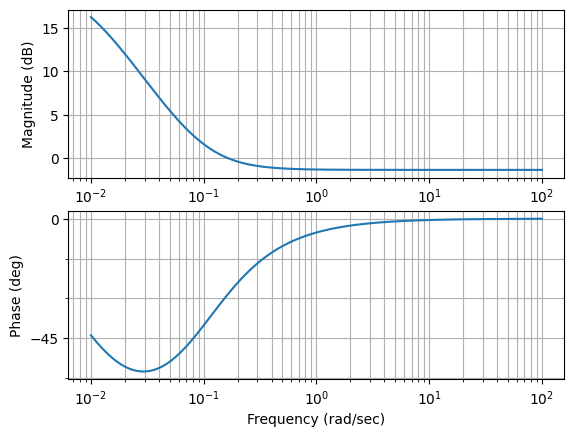

In [4]:
MFdesejada=50

phi=(-180+MFdesejada+5)
indices = np.where(Fase > phi)

indices = list(indices)
print(indices[-1][-1])

corte = indices[-1][-1]

print('Fase', Fase[corte])
print('Modulo', Modulo[corte])
print('Freq', w[corte])

Beta = np.power(10,-Modulo[corte]/20)
Beta = 1/Beta
print('Beta', Beta)
Kc = 5/Beta
print('Kc', Kc)
T = 10 # w=1/T=0.1 << 1.39 rad/s
print('T',T)

num = [T, 1]
den = [ Beta*T, 1]
Gc = Kcbeta*mtb.tf(num,den)
ModuloGc, FaseGc, wGc = mtb.bode(Gc,w)

print(Gc)

Margem de Ganho inf e freq. cruz. de fase nan
Margem de Fase 51.28313467921919  e freq. cruz. de ganho 1.3992630329058973
Sistema compensado 
        400 s + 40
---------------------------
117.4 s^3 + 235.8 s^2 + 2 s



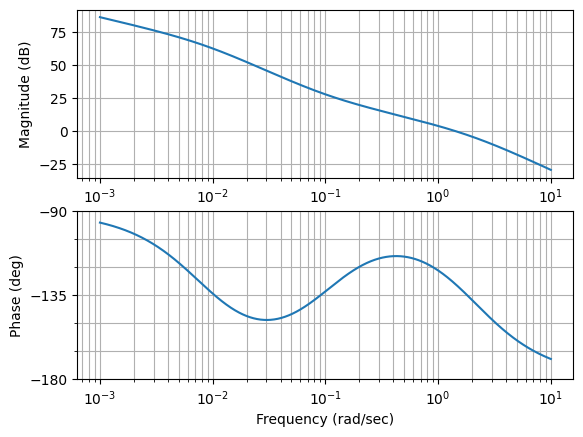

In [ ]:
import control
MG, MF, wcf, wcg = mtb.margin(Gc*G)

print(f"Margem de Ganho {MG} e freq. cruz. de fase {wcf}")
print(f"Margem de Fase {MF}  e freq. cruz. de ganho {wcg}")

ModuloComp, FaseComp, wComp = mtb.bode(G*Gc)
print("Sistema compensado",G*Gc)